In [3]:
# import libraties
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

beer = pd.read_csv('beer_data.csv')

In [4]:
beer.duplicated()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
475954    False
475955    False
475956    False
475957    False
475958    False
475959    False
475960    False
475961    False
475962    False
475963    False
475964    False
475965    False
475966    False
475967    False
475968    False
475969    False
475970    False
475971    False
475972    False
475973    False
475974    False
475975    False
475976    False
475977    False
475978    False
475979    False
475980    False
475981    False
475982    False
475983    False
Length: 475984, dtype: b

In [5]:
beer.head()

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5


In [6]:
counts = beer['beer_beerid'].value_counts().to_dict()

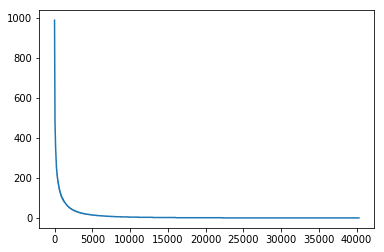

In [7]:

plt.plot(range(len(counts)), list(counts.values()))

In [8]:

beer = beer.groupby('beer_beerid').filter(lambda x: len(x) >= 50)

In [9]:
beer.drop_duplicates()

,beer_beerid,review_profilename,review_overall
12,436,Brent,3.0
101,10784,CHILLINDYLAN,4.5
102,10784,JayQue,4.0
103,10784,AlCaponeJunior,4.0
104,10784,BEERchitect,4.0
105,10784,Jayli,4.0
106,10784,clayrock81,4.0
107,10784,beerphan,4.0
108,10784,OWSLEY069,3.0
109,10784,AEK,4.0


## Dividing the dataset into train and test

In [10]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(beer, test_size=0.30, random_state=30)

In [11]:
print(train.shape)
print(test.shape)

(208142, 3)
(89204, 3)


In [12]:
train.drop_duplicates(inplace=True)

C:\Users\sonu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
# pivot ratings into beer features
df_beer_features = train.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
    #aggfunc='mean'
).fillna(0)

In [14]:
df_beer_features.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04101Brewer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0runkp0s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df_beer_features.shape

(17123, 2069)

In [16]:
dummy_train = train.copy()
dummy_test = test.copy()

In [17]:
dummy_train['review_overall'] = dummy_train['review_overall'].apply(lambda x: 0 if x>=1 else 0)
dummy_test['review_overall'] = dummy_test['review_overall'].apply(lambda x: 1 if x>=1 else 0)

In [18]:
# The beer not rated by user is marked as 1 for prediction. 
dummy_train = dummy_train.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(1)

# The beer not rated by user is marked as 0 for evaluation. 
dummy_test = dummy_test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(0)

In [19]:
dummy_train.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
04101Brewer,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
05Harley,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0beerguy0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0runkp0s,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [20]:
dummy_test.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01Ryan10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000Bottles,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_beer_features, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

In [ ]:
user_correlation.shape

In [ ]:
beer_features = train.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [ ]:
beer_features.head()

In [ ]:
mean = np.nanmean(beer_features, axis=1)
df_subtracted = (beer_features.T-mean).T

#### Average rating given by the users

In [ ]:
mean

#### Overall average rating given by the user

In [ ]:
average_mean = np.mean(mean)
average_mean

In [ ]:
df_subtracted.head()

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

In [ ]:
users = beer_features.index[0:10]
users

In [ ]:
first_10_user = user_correlation[0:10, 0:10]
first_10_user

In [ ]:
import seaborn as sns; sns.set()
ax = sns.heatmap(first_10_user, linewidths=.5, xticklabels=users, yticklabels=users)
plt.show()

## Prediction

In [ ]:
user_correlation[user_correlation<0]=0
user_correlation

In [ ]:
user_predicted_ratings = np.dot(user_correlation, beer_features.fillna(0))
user_predicted_ratings

In [ ]:
user_predicted_ratings.shape

In [ ]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

### Finding the top 5 recommendation for the users

In [ ]:
#For user 'cokes'
user_final_rating.ix['cokes'].sort_values(ascending=False)[0:5]

In [ ]:
#For user 'genog'
user_final_rating.ix['genog'].sort_values(ascending=False)[0:5]

In [ ]:
#For user 'giblet'
user_final_rating.ix['giblet'].sort_values(ascending=False)[0:5]

In [ ]:
beer_features = train.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).T

beer_features.head()

### Normalising the beer rating for each beer

In [ ]:
mean = np.nanmean(beer_features, axis=1)
df_subtracted = (beer_features.T-mean).T

#### Average rating given to the beer

In [ ]:
mean

#### Overall average rating given to the beer

In [ ]:
average_mean = np.mean(mean)
average_mean

In [ ]:
df_subtracted.head()

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

In [ ]:
item_correlation[item_correlation<0]=0
item_correlation

In [ ]:
first_10_item = item_correlation[0:10, 0:10]
first_10_item

In [ ]:
import seaborn as sns; sns.set()
ax = sns.heatmap(first_10_item, linewidths=.5)
plt.show()

# Prediction

In [ ]:
item_predicted_ratings = np.dot((beer_features.fillna(0).T),item_correlation)
item_predicted_ratings

In [ ]:
item_predicted_ratings.shape

In [ ]:
dummy_train.shape

### Filtering the rating only for the beer not rated by the user for recommendation

In [ ]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

### Top 5 prediction for the users

In [ ]:
#For user 'cokes'
item_final_rating.ix['cokes'].sort_values(ascending=False)[0:5]

In [ ]:
#For user 'genog'
item_final_rating.ix['genog'].sort_values(ascending=False)[0:5]

In [ ]:
#For user 'giblet'
item_final_rating.ix['giblet'].sort_values(ascending=False)[0:5]

# Evaluation

In [ ]:
test_beer_features = test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)
mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

# User Similarity Matrix
test_user_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_user_correlation[np.isnan(test_user_correlation)] = 0
print(test_user_correlation)

In [ ]:
test_user_correlation[test_user_correlation<0]=0
test_user_predicted_ratings = np.dot(test_user_correlation, test_beer_features.fillna(0))
test_user_predicted_ratings

### Doing prediction for the beer rated by the user

In [ ]:
test_user_final_rating = np.multiply(test_user_predicted_ratings,dummy_test)

In [ ]:
test_user_final_rating.head()

### Calculating the RMSE for only the beer rated by user. For  RMSE, normalising the rating to (1,5) range. 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_user_final_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

In [ ]:
test_ = test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [ ]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [ ]:
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)

## Using Item similarity

In [ ]:
test_beer_features = test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).T

mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

test_item_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_item_correlation[np.isnan(test_item_correlation)] = 0
test_item_correlation[test_item_correlation<0]=0

In [ ]:
test_item_correlation.shape

In [ ]:
test_beer_features.shape

In [ ]:
test_item_predicted_ratings = (np.dot(test_item_correlation, test_beer_features.fillna(0))).T
test_item_final_rating = np.multiply(test_item_predicted_ratings,dummy_test)
test_item_final_rating.head()

In [ ]:
test_ = test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_item_final_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))


test_ = test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

### Finding RMSE

In [ ]:
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)

#### Conclusion: Item based similarity is performing slightly better than user based similarity. So, it should be deployed. 